# Prosper loan data exploration
## by Vaibhav Gupta

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans with 81 variables on each loan. I only explore 10 variables in this dataset.

In [189]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [190]:
# load in the dataset into a pandas dataframe, print statistics
loandata = pd.read_csv('prosperLoanData.csv')

In [191]:
# high-level overview of data shape and composition
print(loandata.shape)
print(loandata.dtypes)
loandata.head(10)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [192]:
loandata.dtypes.Investors

dtype('int64')

### What is the structure of your dataset?

The dataset consists of 113,937 entries and 81 columns related to different variables of each particular loan taken by the borrower. Most of the features are numeric, with some being categorical.

### What is/are the main feature(s) of interest in your dataset?

I am interested in investigating about the following questions:
- What factors affect a loan's outcome status?
- What affects the borrower's APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?
- How does the number of investors vary with other variables?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I am considering the following features in the dataset to support my investigation: Term, LoanStatus, BorrowerAPR, BorrowerRate, EmploymentStatusDuration, AmountDelinquent, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, and Investors. 

I think that the variables LoanOriginalAmount, BorrowerAPR, and StatedMonthlyIncome should have a major impact on the LoanStatus. The borrower's APR should depend on EmploymentStatusDuration, StatedMonthlyIncome and LoanOriginalAmount. The original loan amount would affect the LoanStatus and Investors.

I am creating a new dataframe with only the above columns below.

In [193]:
df_loandata = loandata[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration'
                            , 'AmountDelinquent', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Investors']]
df_loandata.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,AmountDelinquent,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Investors
0,36,Completed,0.16516,0.1580,2.0,472.0,True,3083.333333,9425,258
1,36,Current,0.12016,0.0920,44.0,0.0,True,6125.000000,10000,1
2,36,Completed,0.28269,0.2750,NaN,NaN,True,2083.333333,3001,41
3,36,Current,0.12528,0.0974,113.0,10056.0,True,2875.000000,10000,158
4,36,Current,0.24614,0.2085,44.0,0.0,True,9583.333333,15000,20


In [194]:
df_loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
Term                        113937 non-null int64
LoanStatus                  113937 non-null object
BorrowerAPR                 113912 non-null float64
BorrowerRate                113937 non-null float64
EmploymentStatusDuration    106312 non-null float64
AmountDelinquent            106315 non-null float64
IncomeVerifiable            113937 non-null bool
StatedMonthlyIncome         113937 non-null float64
LoanOriginalAmount          113937 non-null int64
Investors                   113937 non-null int64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 7.9+ MB


I can see from the above information that there are a few missing entries for EmploymentStatusDuration and AmountDelinquent. So I delete those rows in our dataset for a better analysis using the code below.

In [195]:
# Delete rows having missing values 
df_loandata.dropna(inplace=True)
df_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106292 entries, 0 to 113936
Data columns (total 10 columns):
Term                        106292 non-null int64
LoanStatus                  106292 non-null object
BorrowerAPR                 106292 non-null float64
BorrowerRate                106292 non-null float64
EmploymentStatusDuration    106292 non-null float64
AmountDelinquent            106292 non-null float64
IncomeVerifiable            106292 non-null bool
StatedMonthlyIncome         106292 non-null float64
LoanOriginalAmount          106292 non-null int64
Investors                   106292 non-null int64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 8.2+ MB


C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Univariate Exploration

Let's start by exploring the two categorical variables LoanStatus and IncomeVerifiable. I plot bar charts for these variables below.

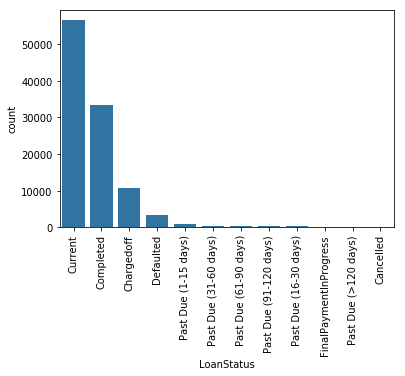

In [196]:
base_color = sb.color_palette()[0]
status_order = df_loandata['LoanStatus'].value_counts().index
sb.countplot(data=df_loandata, x='LoanStatus', color=base_color, order=status_order);
plt.xticks(rotation=90);

I can see from the above plot that most of the loans are in the status Current, Completed, Chargedoff or Defaulted. The actual proportions of Past Due and Cancelled statuses are not clearly visible. So I plot the same bar chart having relative frequencies below.

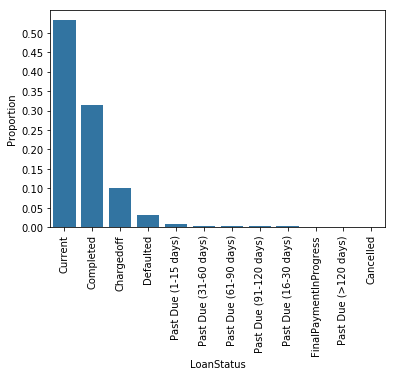

In [197]:
# get proportion taken by most common group for derivation of tick marks
n_points = df_loandata.shape[0]
max_count = df_loandata['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = df_loandata, x = 'LoanStatus', color = base_color, order=status_order);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('Proportion')
plt.xticks(rotation=90);

I can see from the above plot that the loans having the status of Defaulted or worse are less than 5%. Almost 90% of the loans are either Current or Completed. I plot the bar chart for IncomeVerifiable next.

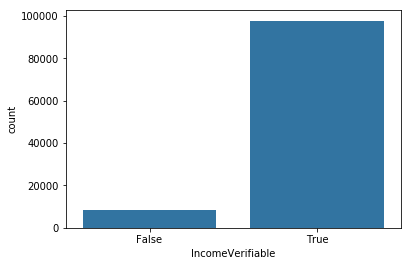

In [198]:
sb.countplot(data=df_loandata, x='IncomeVerifiable', color=base_color);

I can see from the above plot that most of the borrowers have indicated that they have the required documentation to support their income. Next, I plot the histograms for the remaining numeric variables in our analysis.

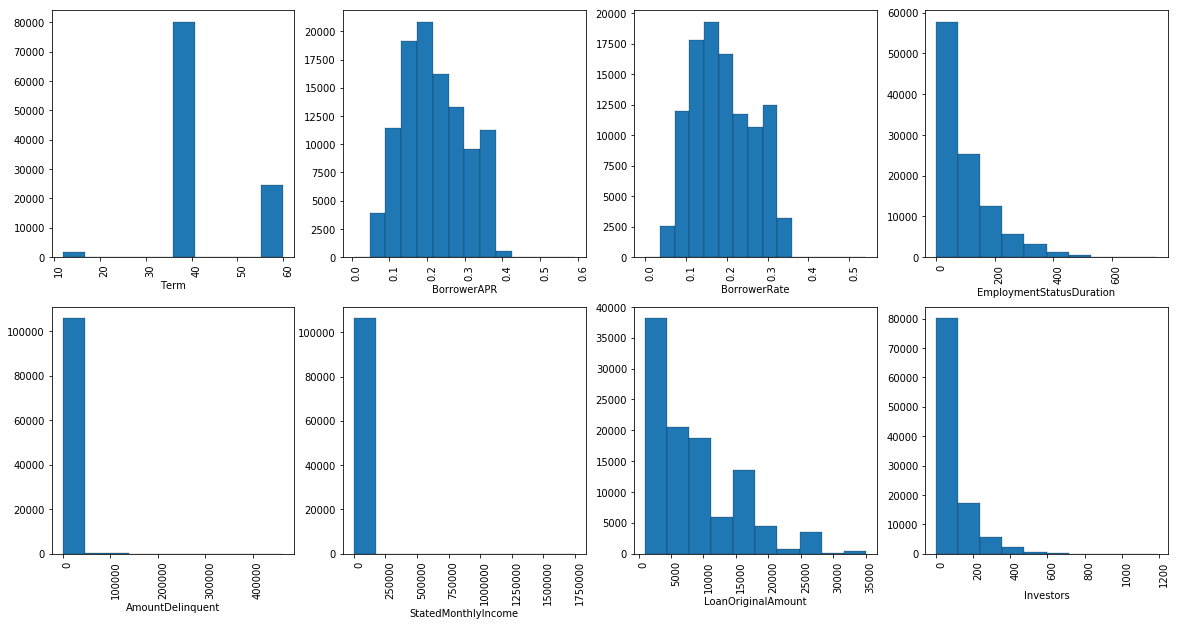

In [199]:
# Plot remaining numeric variables in our analysis

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = [20,10])

numeric_var = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 'AmountDelinquent', 
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'Investors']
for i in range(2):
    for j in range(4):
        var = numeric_var[(i*4)+j]
        bins = np.arange(min(df_loandata[var]), max(df_loandata[var])+0.2, (max(df_loandata[var])-min(df_loandata[var]))/10)
        ax[i,j].hist(data = df_loandata, x = var, bins = bins, linewidth=0.2, edgecolor='black')
        ax[i,j].set_xlabel('{}'.format(var))
        plt.setp(ax[i,j].get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

plt.show()

I can observe the following points from the plot above:
 - Most of the loans are for the term of 35 to 40 months, with some between 55 to 60 and very few between 12 and 16.
 - BorrowerAPR follows a bimodal distribution with first peak near 0.2 and second near 0.33. BorrowerRate follows a similar trend.
 - EmploymentStatusDuration is skewed towards the right, with most of the values less than 200.
 - LoanOriginalAmount is trimodal with three peaks around 1000, 15000 and 25000.
 - Investors is skewed towards the right, with most of the values less than 220.
 
The distributions for AmountDelinquent and StatedMonthlyIncome have a single peak and some values which occur rarely. It is probably a good idea to investigate these more through a box plot for possible outlier detection.

In [200]:
df_loandata['AmountDelinquent'].describe()

count    106292.000000
mean        984.650294
std        7159.011638
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [201]:
sum(df_loandata['AmountDelinquent'] == 0)

89798

In [202]:
sum(df_loandata['AmountDelinquent'] > 0)

16494

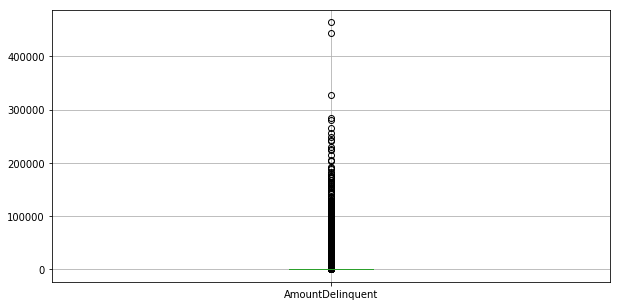

In [203]:
df_loandata.boxplot(column=['AmountDelinquent'], figsize=(10,5));

I can note from the descriptive statistics and box plot above that most of the values for AmountDelinquent are zero, with only 15.5% greater than zero. So looks like there are some borrowers (15.5%) who have a non-zero amount delinquent. There are three values which are very far away from the rest, which seem to be outliers. I remove them from the dataset using the code below. 

In [204]:
indexNames = df_loandata[df_loandata['AmountDelinquent']>300000].index
df_loandata.drop(indexNames, inplace=True)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


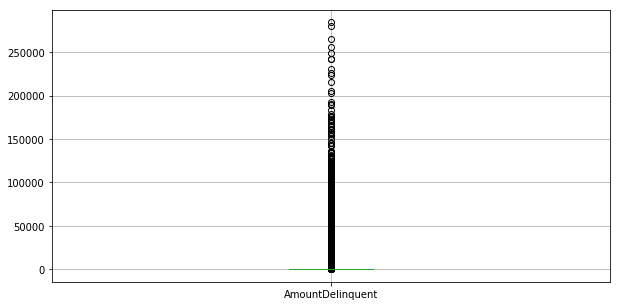

In [205]:
df_loandata.boxplot(column=['AmountDelinquent'], figsize=(10,5));

I can see from the above plot that the outliers have been removed. Let's do a similar analysis on StatedMonthlyIncome.

In [206]:
df_loandata['StatedMonthlyIncome'].describe()

count    1.062890e+05
mean     5.671140e+03
std      7.607859e+03
min      0.000000e+00
25%      3.332917e+03
50%      4.750000e+03
75%      6.916667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [207]:
sum(df_loandata['StatedMonthlyIncome'] == 0)

1344

In [208]:
sum(df_loandata['StatedMonthlyIncome'] > 0)

104945

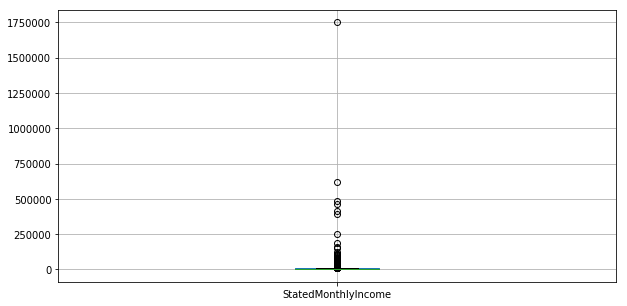

In [209]:
df_loandata.boxplot(column=['StatedMonthlyIncome'], figsize=(10,5));

I see from the descriptive statistics and box plot above that 75% of the values are below 6916.67. It seems unlikely for so many people to have a very large monthly income and borrow a loan. It will be interesting to print the inter-quartile range (IQR) and then remove values which fall outside the range [Q1-1.5\*IQR, Q3+1.5\*IQR].

In [210]:
Q1 = df_loandata['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loandata['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3-Q1
invalidindices = df_loandata[(df_loandata['StatedMonthlyIncome'] < (Q1-1.5*IQR)) | (df_loandata['StatedMonthlyIncome'] > (Q3+1.5*IQR))].index
df_loandata.drop(index=invalidindices, inplace=True)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


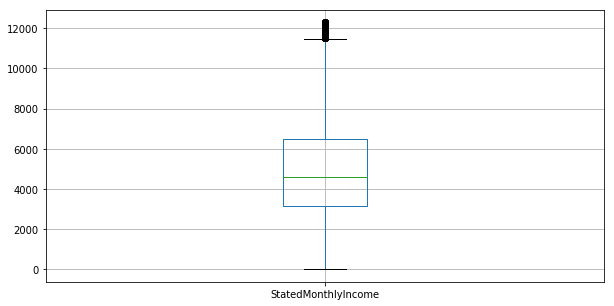

In [211]:
df_loandata.boxplot(column=['StatedMonthlyIncome'], figsize=(10,5));

I can see from the above plot that the outliers have been removed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Term took values only in three ranges (12 to 16, 35 to 40, and 55 to 60). The distributions for BorrowerAPR and BorrowerRate were bimodal, while that for LoanOriginalAmount was trimodal. The distributions for EmploymentStatusDuration and Investors were skewed towards the right. I did not perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions for AmountDelinquent and StatedMonthlyIncome had a single peak and had to be investigated further for presence of outliers. There were a few outliers found using the box plot and were removed from the dataset.

## Bivariate Exploration

I start by exploring the correlations between the different numeric variables. 

In [212]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration',
                'AmountDelinquent', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Investors']
categoric_vars = ['LoanStatus', 'IncomeVerifiable']

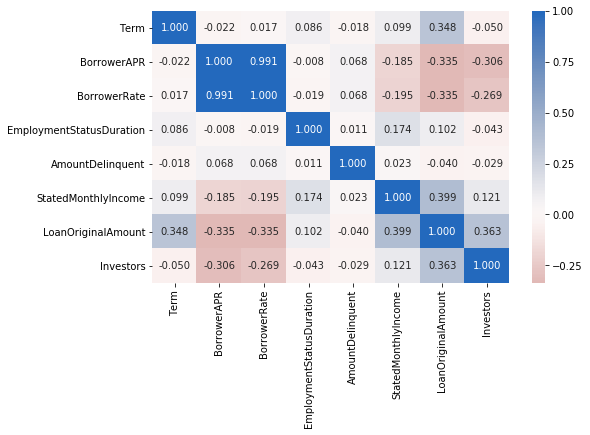

In [213]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_loandata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

I can see from the above plot that BorrowerRate and BorrowerAPR are highly correlated with a positive linear relationship. There is a weak negative correlation between BorrowerAPR and LoanOriginalAmount, Investors. There is a weak positive correlation between LoanOriginalAmount and Investors, StatedMonthlyIncome, and Term. The rest of the variables don't seem to have a linear relationship among them. I investigate the relationships between all variables through a scatter plot matrix next.

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


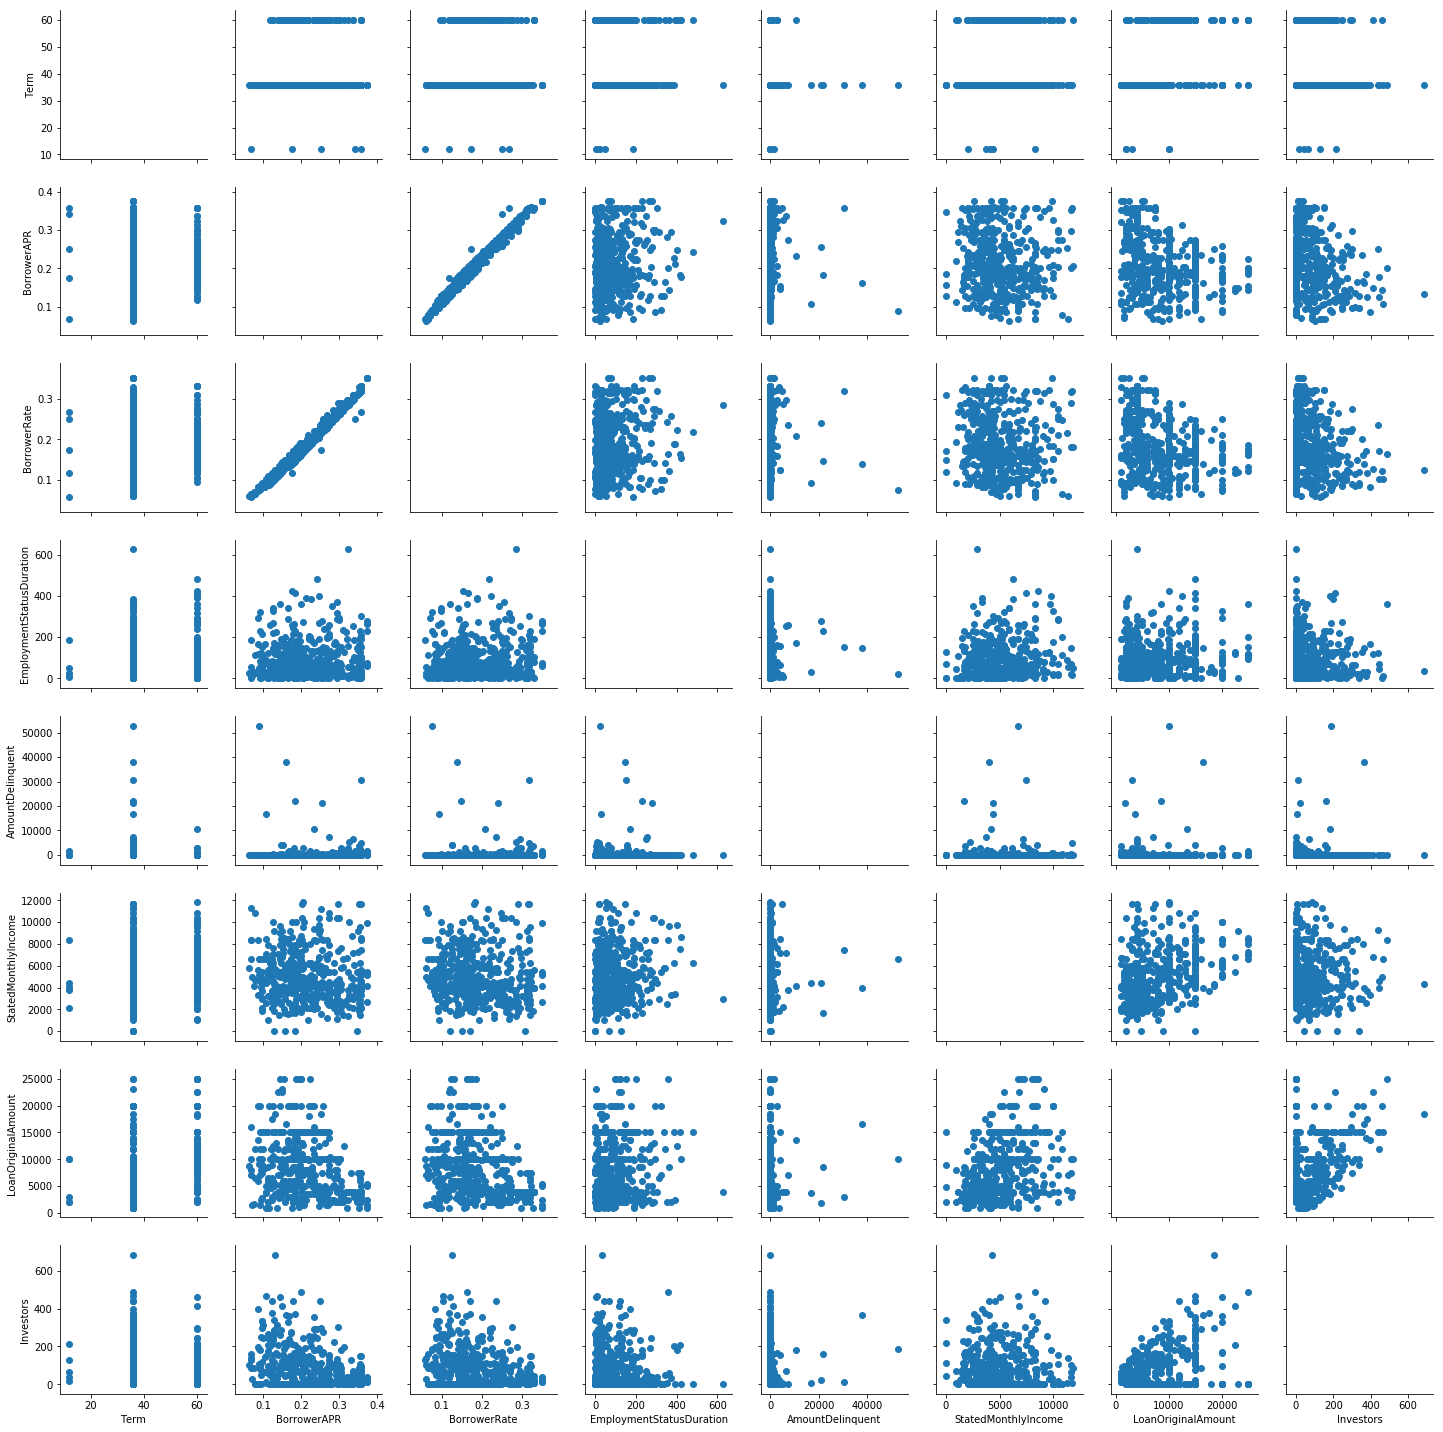

In [214]:
# Scatter plot matrix for numeric variables
samples = np.random.choice(df_loandata.shape[0], 500, replace = False)
loandata_samp = df_loandata.loc[samples,:]

g = sb.PairGrid(data = loandata_samp, vars = numeric_vars);
#g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter);

I can make the following observations from the scatterplot matrix above:
 - Term does not seem to have a relationship with other numeric variables.
 - The number of investors is more for a larger loan amount and lower borrower APR.
 - The loan amount seems to increase with an increase in stated monthly income.
 
 I will plot the above variables again using the full dataset for a better understanding.

In [215]:
# Function to generate scatter plot and heat map for two numeric variables
def plot_scatter_and_heat_map(varx, vary):
    plt.figure(figsize = [12, 5])

    # left plot: scatterplot of discrete data with jitter and transparency
    plt.subplot(1, 2, 1)
    sb.regplot(data = df_loandata, x = varx, y = vary, fit_reg = False, scatter_kws = {'alpha' : 1/3})
               #x_jitter = 0.2, y_jitter = 0.2)

    # right plot: heat map with bin edges between values
    plt.subplot(1, 2, 2)
    bins_x = np.arange(min(df_loandata[varx]), max(df_loandata[varx])+10, (max(df_loandata[varx])-min(df_loandata[varx]))/10)
    bins_y = np.arange(min(df_loandata[vary]), max(df_loandata[vary])+10, (max(df_loandata[vary])-min(df_loandata[vary]))/10)
    plt.hist2d(data = df_loandata, x = varx, y = vary, bins = [bins_x, bins_y], cmap='viridis_r')
    plt.colorbar();

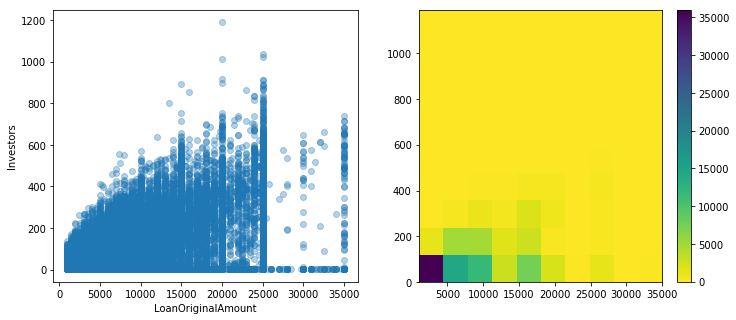

In [216]:
# Plot of Investors vs. LoanOriginalAmount 
plot_scatter_and_heat_map('LoanOriginalAmount', 'Investors')

The above plot shows that as the loan amount increases, the number of investors also increases. There are a large number of points with a loan amount less than 5000 and number of investors less than 120.

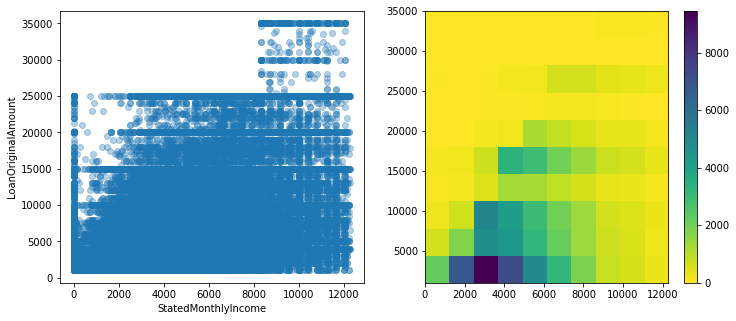

In [217]:
# Plot of LoanOriginalAmount vs. StatedMonthlyIncome
plot_scatter_and_heat_map('StatedMonthlyIncome', 'LoanOriginalAmount')

I can observe that borrowers having a loan amount of more than 25000 have a monthly income greater than approximately 9000.

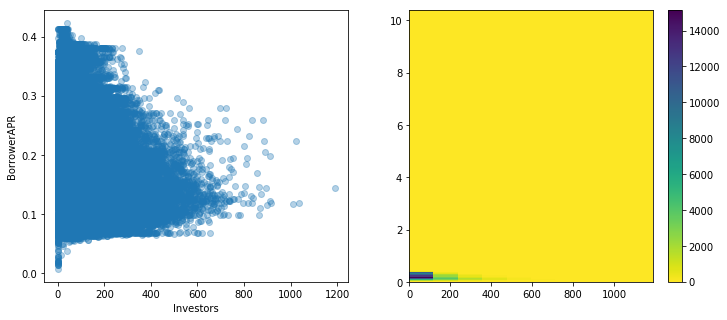

In [218]:
# Plot of BorrowerAPR vs. Investors
plot_scatter_and_heat_map('Investors', 'BorrowerAPR')

As the number of investors increases beyond 400, they tend to prefer borrowers with a lower APR. In other words, borrowers with a lower APR have more investors than those with a higher APR.

Now let's look at the relationship between LoanStatus, IncomeVerifiable and other numeric variables.

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 720x720 with 0 Axes>

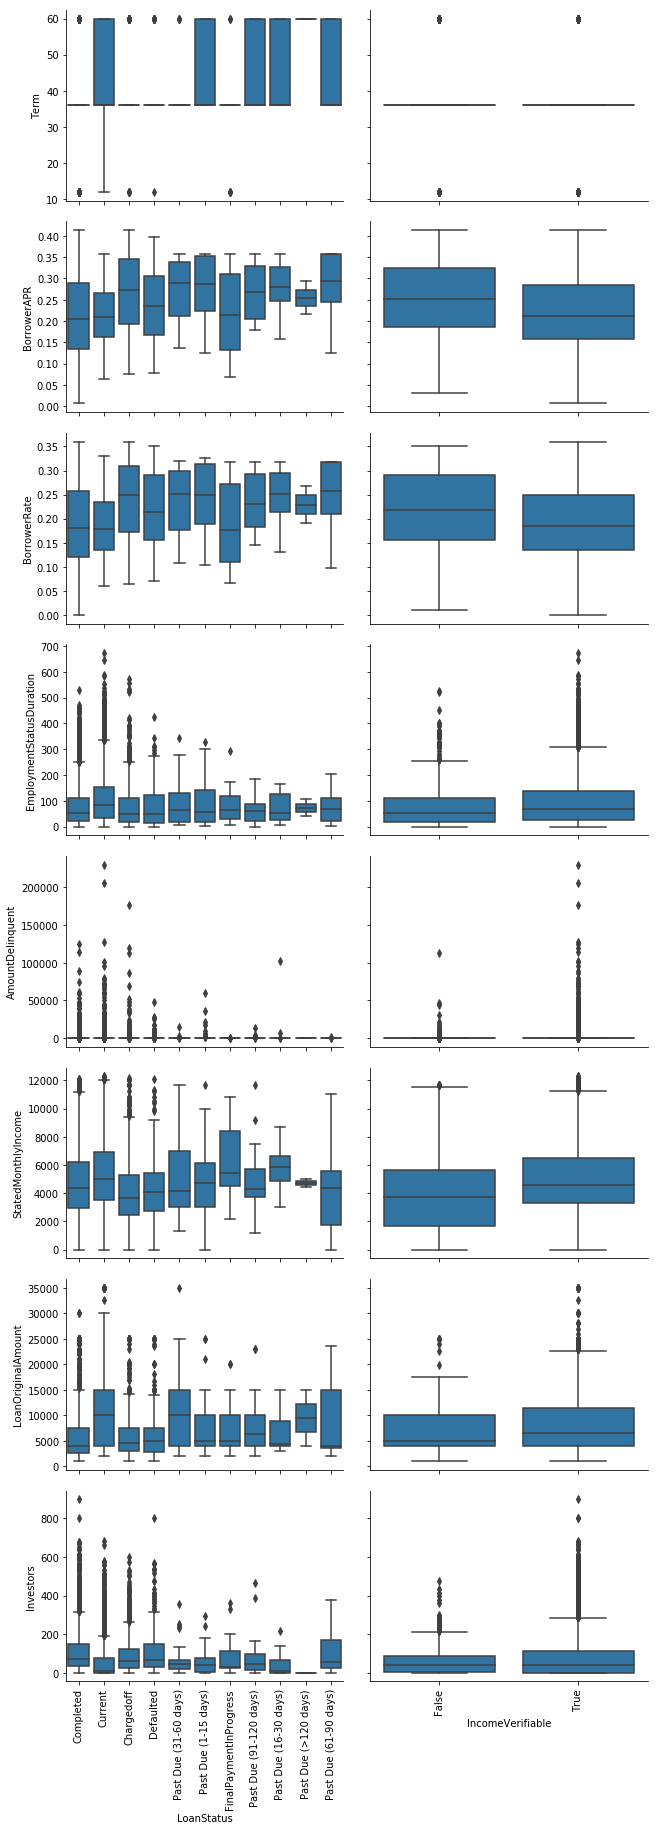

In [219]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_loandata.shape[0], 10000, replace = False)
loandata_samp = df_loandata.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loandata_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

I can see from the above plot that LoanStatus has very little variation with the numeric variables Term, EmploymentStatusDuration and Investors. The relationship of other variables needs further investigation with individual plots which is done below.

There are more investors for loans where the borrower income is verifiable. The loan amount, stated monthly income and duration of employment are more in general for verified incomes, while BorrowerAPR is less.

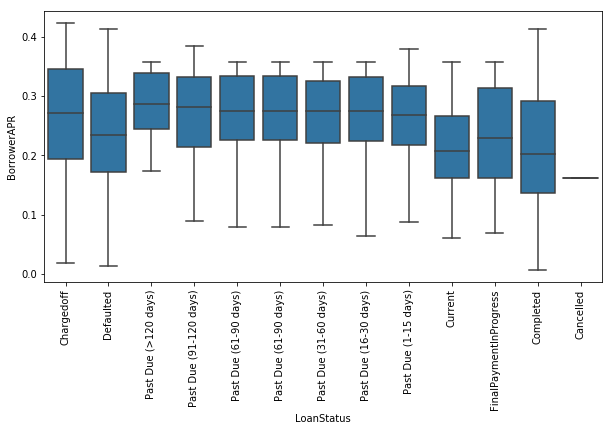

In [220]:
# Plot of BorrowerAPR vs. LoanStatus
loan_status_order = ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
                     'Past Due (61-90 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)',
                     'Past Due (16-30 days)', 'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress',
                     'Completed', 'Cancelled']
base_color = sb.color_palette()[0]
def gen_box_plot(varx, vary):
    plt.figure(figsize = [10, 5])
    sb.boxplot(data = df_loandata, x = varx, y = vary, color = base_color, order=loan_status_order);
    plt.xticks(rotation=90);
gen_box_plot('LoanStatus', 'BorrowerAPR')    

I can see from the above plot that loans which are past due tend to have a greater BorrowerAPR in general. The loans which are Completed have the lowest median and Q1 (first quartile) value for BorrowerAPR. I investigate the variable StatedMonthlyIncome next. 

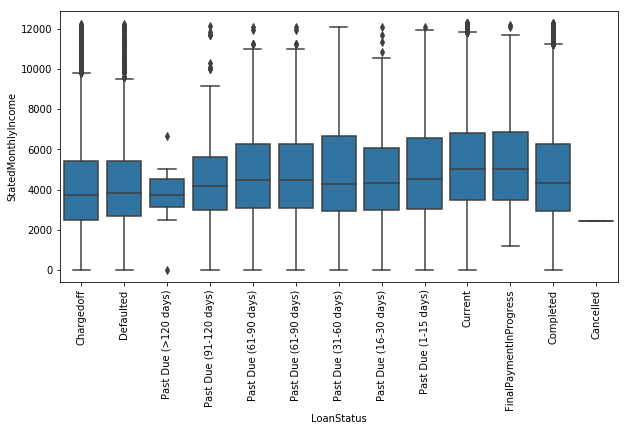

In [221]:
# Plot of StatedMonthlyIncome vs. LoanStatus
gen_box_plot('LoanStatus', 'StatedMonthlyIncome')

I can see from the above plot that the StatedMonthlyIncome having LoanStatus 'Current' and 'FinalPaymentInProgress' has a greater median value than other income values. The LoanStatus values 'Chargedoff', 'Defaulted' and 'Past Due (>120 days)' have a lower income value compared to other values of LoanStatus, which seems intuitive. The LoanStatus 'Completed' has income values which are in a similar range with income values having status Past Due (any number of days). So I will investigate this point further in the multivariate exploration section.

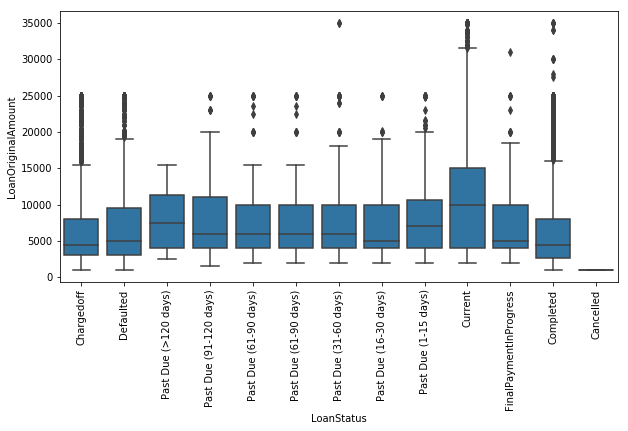

In [222]:
# Plot of LoanOriginalAmount vs. LoanStatus
gen_box_plot('LoanStatus', 'LoanOriginalAmount')

I can see from the above plot that the loan amount for status 'Current' is higher compared to other statuses. The loan amount for the status 'Completed' is lower compared to other statuses, which seems intuitive. 

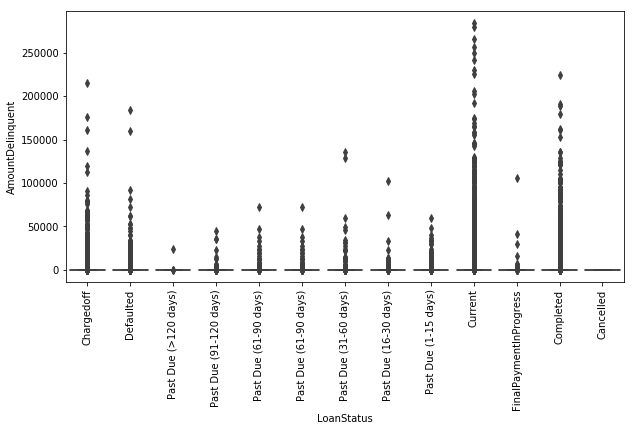

In [223]:
# Plot of AmountDelinquent vs. LoanStatus
gen_box_plot('LoanStatus', 'AmountDelinquent')

I saw in the univariate exploration section that most of the values for AmountDelinquent are zero. The above plot also confirms this. The loan status 'Current' has higher values of AmountDelinquent in general. I think I can get a clearer understanding by creating a new DataFrame with only non-zero values of AmountDelinquent and then analyzing the relationship between LoanStatus and AmountDelinquent. This is done using the code below.

In [224]:
df_loandata_amtdel_nz = df_loandata[df_loandata['AmountDelinquent'] > 0]
df_loandata_amtdel_nz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15969 entries, 0 to 113936
Data columns (total 10 columns):
Term                        15969 non-null int64
LoanStatus                  15969 non-null object
BorrowerAPR                 15969 non-null float64
BorrowerRate                15969 non-null float64
EmploymentStatusDuration    15969 non-null float64
AmountDelinquent            15969 non-null float64
IncomeVerifiable            15969 non-null bool
StatedMonthlyIncome         15969 non-null float64
LoanOriginalAmount          15969 non-null int64
Investors                   15969 non-null int64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 1.2+ MB


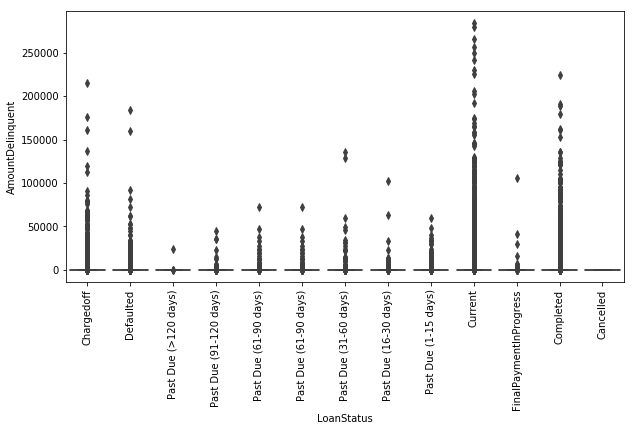

In [225]:
# Plot of AmountDelinquent (non-zero values only) vs. LoanStatus
gen_box_plot('LoanStatus', 'AmountDelinquent')

I can observe from the plot above that there is not much difference between the values of AmountDelinquent for different values of LoanStatus.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - BorrowerAPR and BorrowerRate are highly correlated with a positive linear relationship. There doesn't seem to be a linear relationship among other variables in the dataset.
 - The number of investors increases as the loan amount increases.
 - Borrowers having a loan amount of more than 25000 have a monthly income greater than approximately 9000.
 - Borrowers with a lower APR have more investors than those with a higher APR.
 - BorrowerAPR is less for verified incomes.
 - The loan amount is more for verified incomes.
 - LoanStatus has very little variation with the numeric variables Term, EmploymentStatusDuration and Investors.
 - The loans which are past due (any number of days) tend to have a greater BorrowerAPR. The loans which are Completed have the lowest median and Q1 (first quartile) value for BorrowerAPR.
 - The StatedMonthlyIncome having LoanStatus 'Current' and 'FinalPaymentInProgress' has a greater median value than other income values. The LoanStatus values 'Chargedoff', 'Defaulted' and 'Past Due (>120 days)' have a lower income value compared to other values of LoanStatus, which seems intuitive. The LoanStatus 'Completed' has income values which are in a similar range with income values having status Past Due (any number of days).
 - The loan amount for status 'Current' is higher compared to other statuses. The loan amount for the status 'Completed' is lower compared to other statuses, which seems intuitive.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The stated monthly income, duration of employment and number of investors are more for verified incomes.

## Multivariate Exploration

In this section, I start with exploring how the loan outcome status varies with stated monthly income and loan amount.

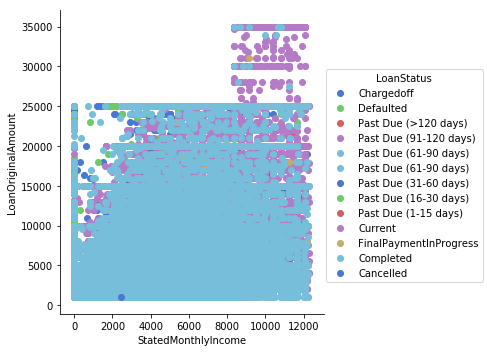

In [226]:
g = sb.FacetGrid(data = df_loandata, hue = 'LoanStatus', size = 5, hue_order=loan_status_order, palette='muted');
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount')
g.add_legend();

The above plot is a little cluttered and difficult to analyze. So I will create another plot by faceting on the levels of LoanStatus.

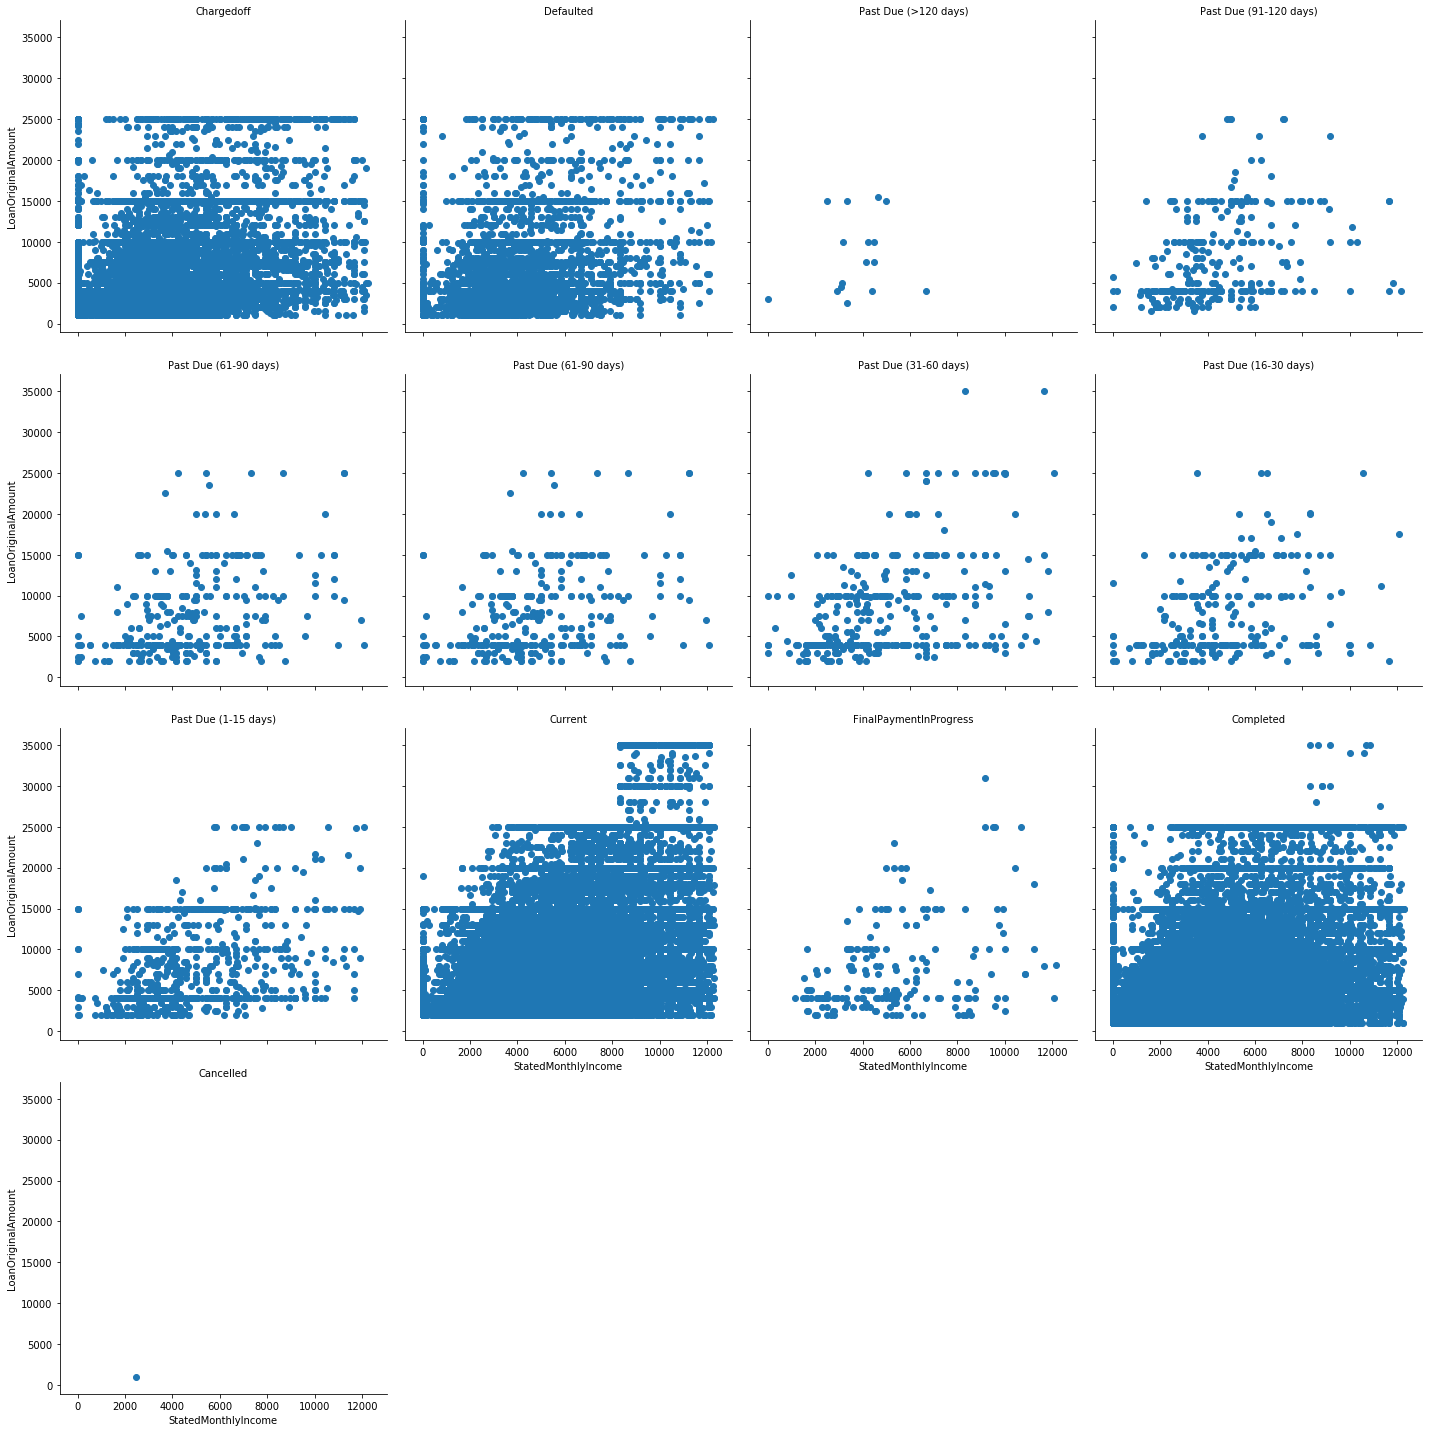

In [227]:
g = sb.FacetGrid(data = df_loandata, col = 'LoanStatus', col_wrap = 4, size = 5, col_order = loan_status_order);
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount')
g.set_titles('{col_name}')

I can see from the above plot that there is only 1 loan in 'Cancelled' status. The loans with amount greater than approximately 25000 are in the 'Current' status, and have a monthly income greater than 8000. There are comparatively lesser loans in the 'Past Due' (any number of days) status. 

Next, I will investigate the interactions between BorrowerAPR, LoanOriginalAmount, and LoanStatus.

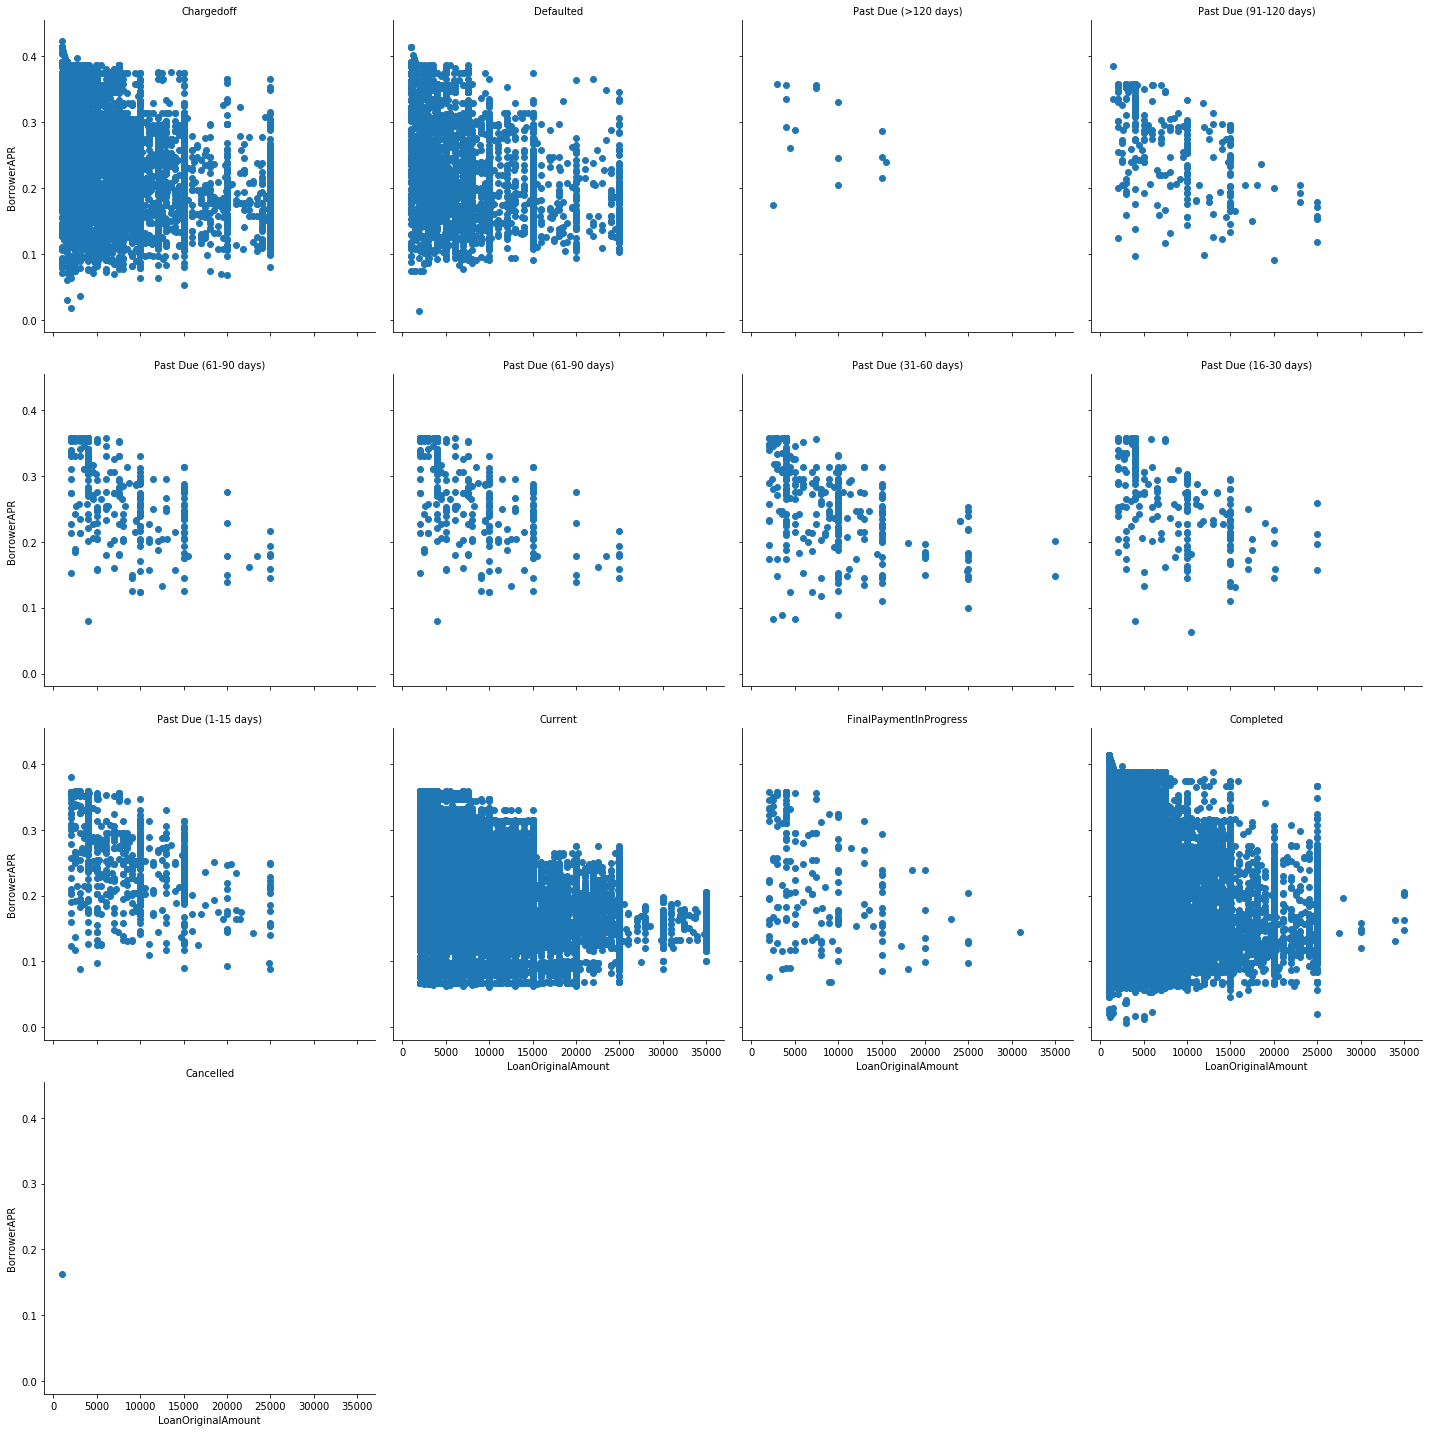

In [228]:
g = sb.FacetGrid(data = df_loandata, col = 'LoanStatus', col_wrap = 4, size = 5, col_order = loan_status_order);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.set_titles('{col_name}')

The loans in the 'Past Due' (any number of days) status have a BorrowerAPR less than 0.4. The loans with an amount greater than 25000 and BorrowerAPR of approximately 0.2 or less are mostly in the 'Current', 'FinalPaymentInProgress', or 'Completed' status.

I will investigate the interactions of BorrowerAPR, Investors, and IncomeVerifiable next. 

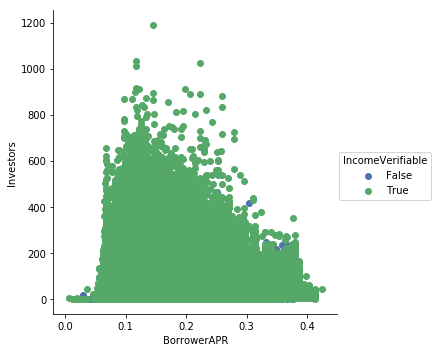

In [229]:
g = sb.FacetGrid(data = df_loandata, hue = 'IncomeVerifiable', size = 5, palette='deep');
g.map(plt.scatter, 'BorrowerAPR', 'Investors');
g.add_legend();

The above plot looks a little cluttered with many points. The number of investors seems to decrease with an increase in BorrowerAPR. It will be interesting to see the trend of IncomeVerifiable for a section of BorrowerAPR in the range of 0.1 to 0.2.

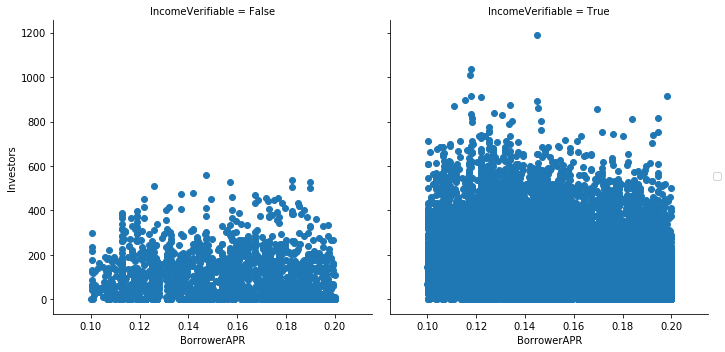

In [230]:
df_loandata_apr_cut = df_loandata[(df_loandata['BorrowerAPR']>=0.1) & (df_loandata['BorrowerAPR']<=0.2)]
g = sb.FacetGrid(data = df_loandata_apr_cut, col = 'IncomeVerifiable', size = 5, palette='deep');
g.map(plt.scatter, 'BorrowerAPR', 'Investors');
g.add_legend();

The above plot shows that there are far more investors for loans where the income is verifiable. 

I will investigate the interactions of LoanOriginalAmount, Investors and IncomeVerifiable next.

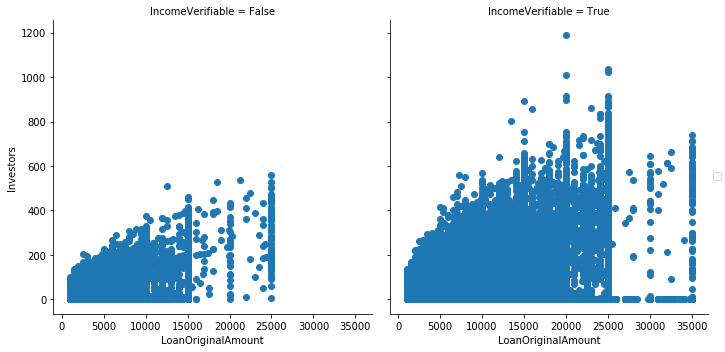

In [231]:
g = sb.FacetGrid(data = df_loandata, col = 'IncomeVerifiable', size = 5, palette='deep');
g.map(plt.scatter, 'LoanOriginalAmount', 'Investors');
g.add_legend();

I can see from the above plot that loans with amount greater than 25000 have their income verifiable too. There are more loans with greater number of investors as the loan amount increases.

Next, I will investigate the interactions among Investors, BorrowerAPR, and LoanOriginalAmount.

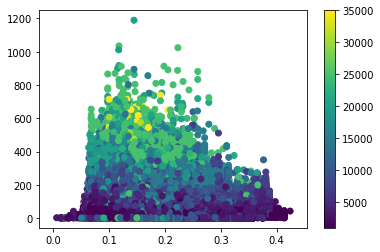

In [237]:
plt.scatter(data = df_loandata, x = 'BorrowerAPR', y = 'Investors', c = 'LoanOriginalAmount')
plt.colorbar();

I can see from the above plot that there are more investors for larger loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The loans with amount greater than approximately 25000 are in the 'Current' status, and have a monthly income greater than 8000. There are comparatively lesser loans in the 'Past Due' (any number of days) status. 
- The loans in the 'Past Due' (any number of days) status have a BorrowerAPR less than 0.4. Loans with a BorrowerAPR of approximately less than 0.5 are mostly in the 'Completed' status, with very few in the 'Chargedoff' or 'Defaulted' status. The loans with an amount greater than 25000 and BorrowerAPR of approximately 0.2 or less are mostly in the 'Current', 'FinalPaymentInProgress', or 'Completed' status.
- As BorrowerAPR increases, the number of points with a large number of investors decreases.
- There are more investors for loans where the income is verifiable.
- The loans with amount greater than 25000 have their income verifiable too. There are more loans with greater number of investors as the loan amount increases.

### Were there any interesting or surprising interactions between features?

I discovered that there are more investors for loans with a higher loan amount, BorrowerAPR in the range of 0.1 to 0.2, and where the income is verifiable.

In [232]:
# Saving the trimmed dataset for use in the explanatory presentation
df_loandata.to_csv('loandata_trimmed.csv', index=False)